# Air quality: an Exploratory Data Analysis Project
This repository contains an exploratory data analysis (EDA) project focused on understanding air quality trends and their relationship with weather conditions. Using the Air Quality Dataset from the UCI Machine Learning Repository, the project applies data cleaning, visualization, and statistical techniques to uncover patterns and insights.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sb
import matplotlib.dates as mdates
import math

In [3]:
# - 1 Loading Data
aiq_data = pd.read_csv('air+quality_ds/AirQualityUCI.csv', delimiter=';')
# Data source: https://archive.ics.uci.edu/dataset/360/air+quality

# Loading data info from the source website
data_info_raw = pd.read_html('https://archive.ics.uci.edu/dataset/360/air+quality')[0]


In [4]:
# - Backup
aiq_data_bk = aiq_data.copy()

# - First look
aiq_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [5]:
aiq_data.info()
aiq_data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


,count,mean,std,min,25%,50%,75%,max
PT08.S1(CO),9357.0,1048.990061,329.832710,-200.0,921.0,1053.0,1221.0,2040.0
NMHC(GT),9357.0,-159.090093,139.789093,-200.0,-200.0,-200.0,-200.0,1189.0
PT08.S2(NMHC),9357.0,894.595276,342.333252,-200.0,711.0,895.0,1105.0,2214.0
NOx(GT),9357.0,168.616971,257.433866,-200.0,50.0,141.0,284.0,1479.0
PT08.S3(NOx),9357.0,794.990168,321.993552,-200.0,637.0,794.0,960.0,2683.0
NO2(GT),9357.0,58.148873,126.940455,-200.0,53.0,96.0,133.0,340.0
PT08.S4(NO2),9357.0,1391.479641,467.210125,-200.0,1185.0,1446.0,1662.0,2775.0
PT08.S5(O3),9357.0,975.072032,456.938184,-200.0,700.0,942.0,1255.0,2523.0
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning

### Step 1: Clean the Data

- Convert decimal commas to dots.
- Remove unnecessary columns.
- Ensure all numeric columns are properly converted.

In [6]:
# - 2 Data Cleaning: 
# The last rows are completely empty, so we can remove them
aiq_data = aiq_data.dropna(how='all')

# Moreover, the column 'Unnamed: 15' and 'Unnamed 16' are completely empty, so we can remove it
aiq_data = aiq_data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

In [7]:
# - 2 Data Cleaning: Proper conversion of the data types and commas, numeric value etc.
# checking that every value has the correct data type
aiq_data.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
dtype: object

# Checking types of DF entries:
=====

|Column|Type|
|--------------------------------------|----------------------------------------|
| Date         |  **object**    |
| Time         |  **object**    |
| CO(GT)       |   **object**   |
| PT08.S1(CO)  |  float64   |
| NMHC(GT)     |  float64   |
| C6H6(GT)     |   **object**   |
| PT08.S2(NMHC)|  float64   |
| NOx(GT)      |  float64   |
| PT08.S3(NOx) |  float64   |
| NO2(GT)      |  float64   |
| PT08.S4(NO2) |  float64   |
| PT08.S5(O3)  |  float64   |
| T            |   **object**   |
| RH           |   **object**   |
| AH           |   **object**   |
| Unnamed: 15  |  float64   |
| Unnamed: 16  |  float64   |

\


|Column|Type|
|------------------------------------|-----------------------------------------------|
|```Date, Time```|Will be merged into a single column named ```DateTime```|
|```CO(GT), C6H6(GT), T, RH, AH```| Will be converter to float64 type|

In [8]:
aiq_data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [9]:
# The current dataframe has the format: 'day/month/year' for the Date column and 'hour:minute:second' for the Time column
# We'll combine the 'Date' and 'Time' columns into a single datetime column
aiq_data['DateTime'] = pd.to_datetime(aiq_data['Date'] + ' ' + aiq_data['Time'], format='%d/%m/%Y %H.%M.%S')
# Drop the 'Date' and 'Time' columns
aiq_data.drop(columns=['Date', 'Time'], inplace=True)
# bring the new DateTime column to the first position
aiq_data = aiq_data[['DateTime'] + [col for col in aiq_data.columns if col != 'DateTime']] #is this the correct way to reorder columns?

In [10]:
# converting non numeric columns to numeric {CO(GT), C6H6(GT), T, RH, AH}
# The columns 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH' have commas instead of dots, so we need to replace them
# aiq_data['column'] = pd.to_numeric((aiq_data['column']).str.replace(',', '.'), errors = 'coerce')

for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    aiq_data[col] = pd.to_numeric((aiq_data[col]).str.replace(',', '.'), errors = 'coerce')

In [11]:
# A quick review of the data after the first part of the cleaning process:
aiq_data.head()

,DateTime,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
# - 3 Data Exploration
# - 3.1 Missing values - Checking for missing values
aiq_data.isnull().sum()

DateTime         0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

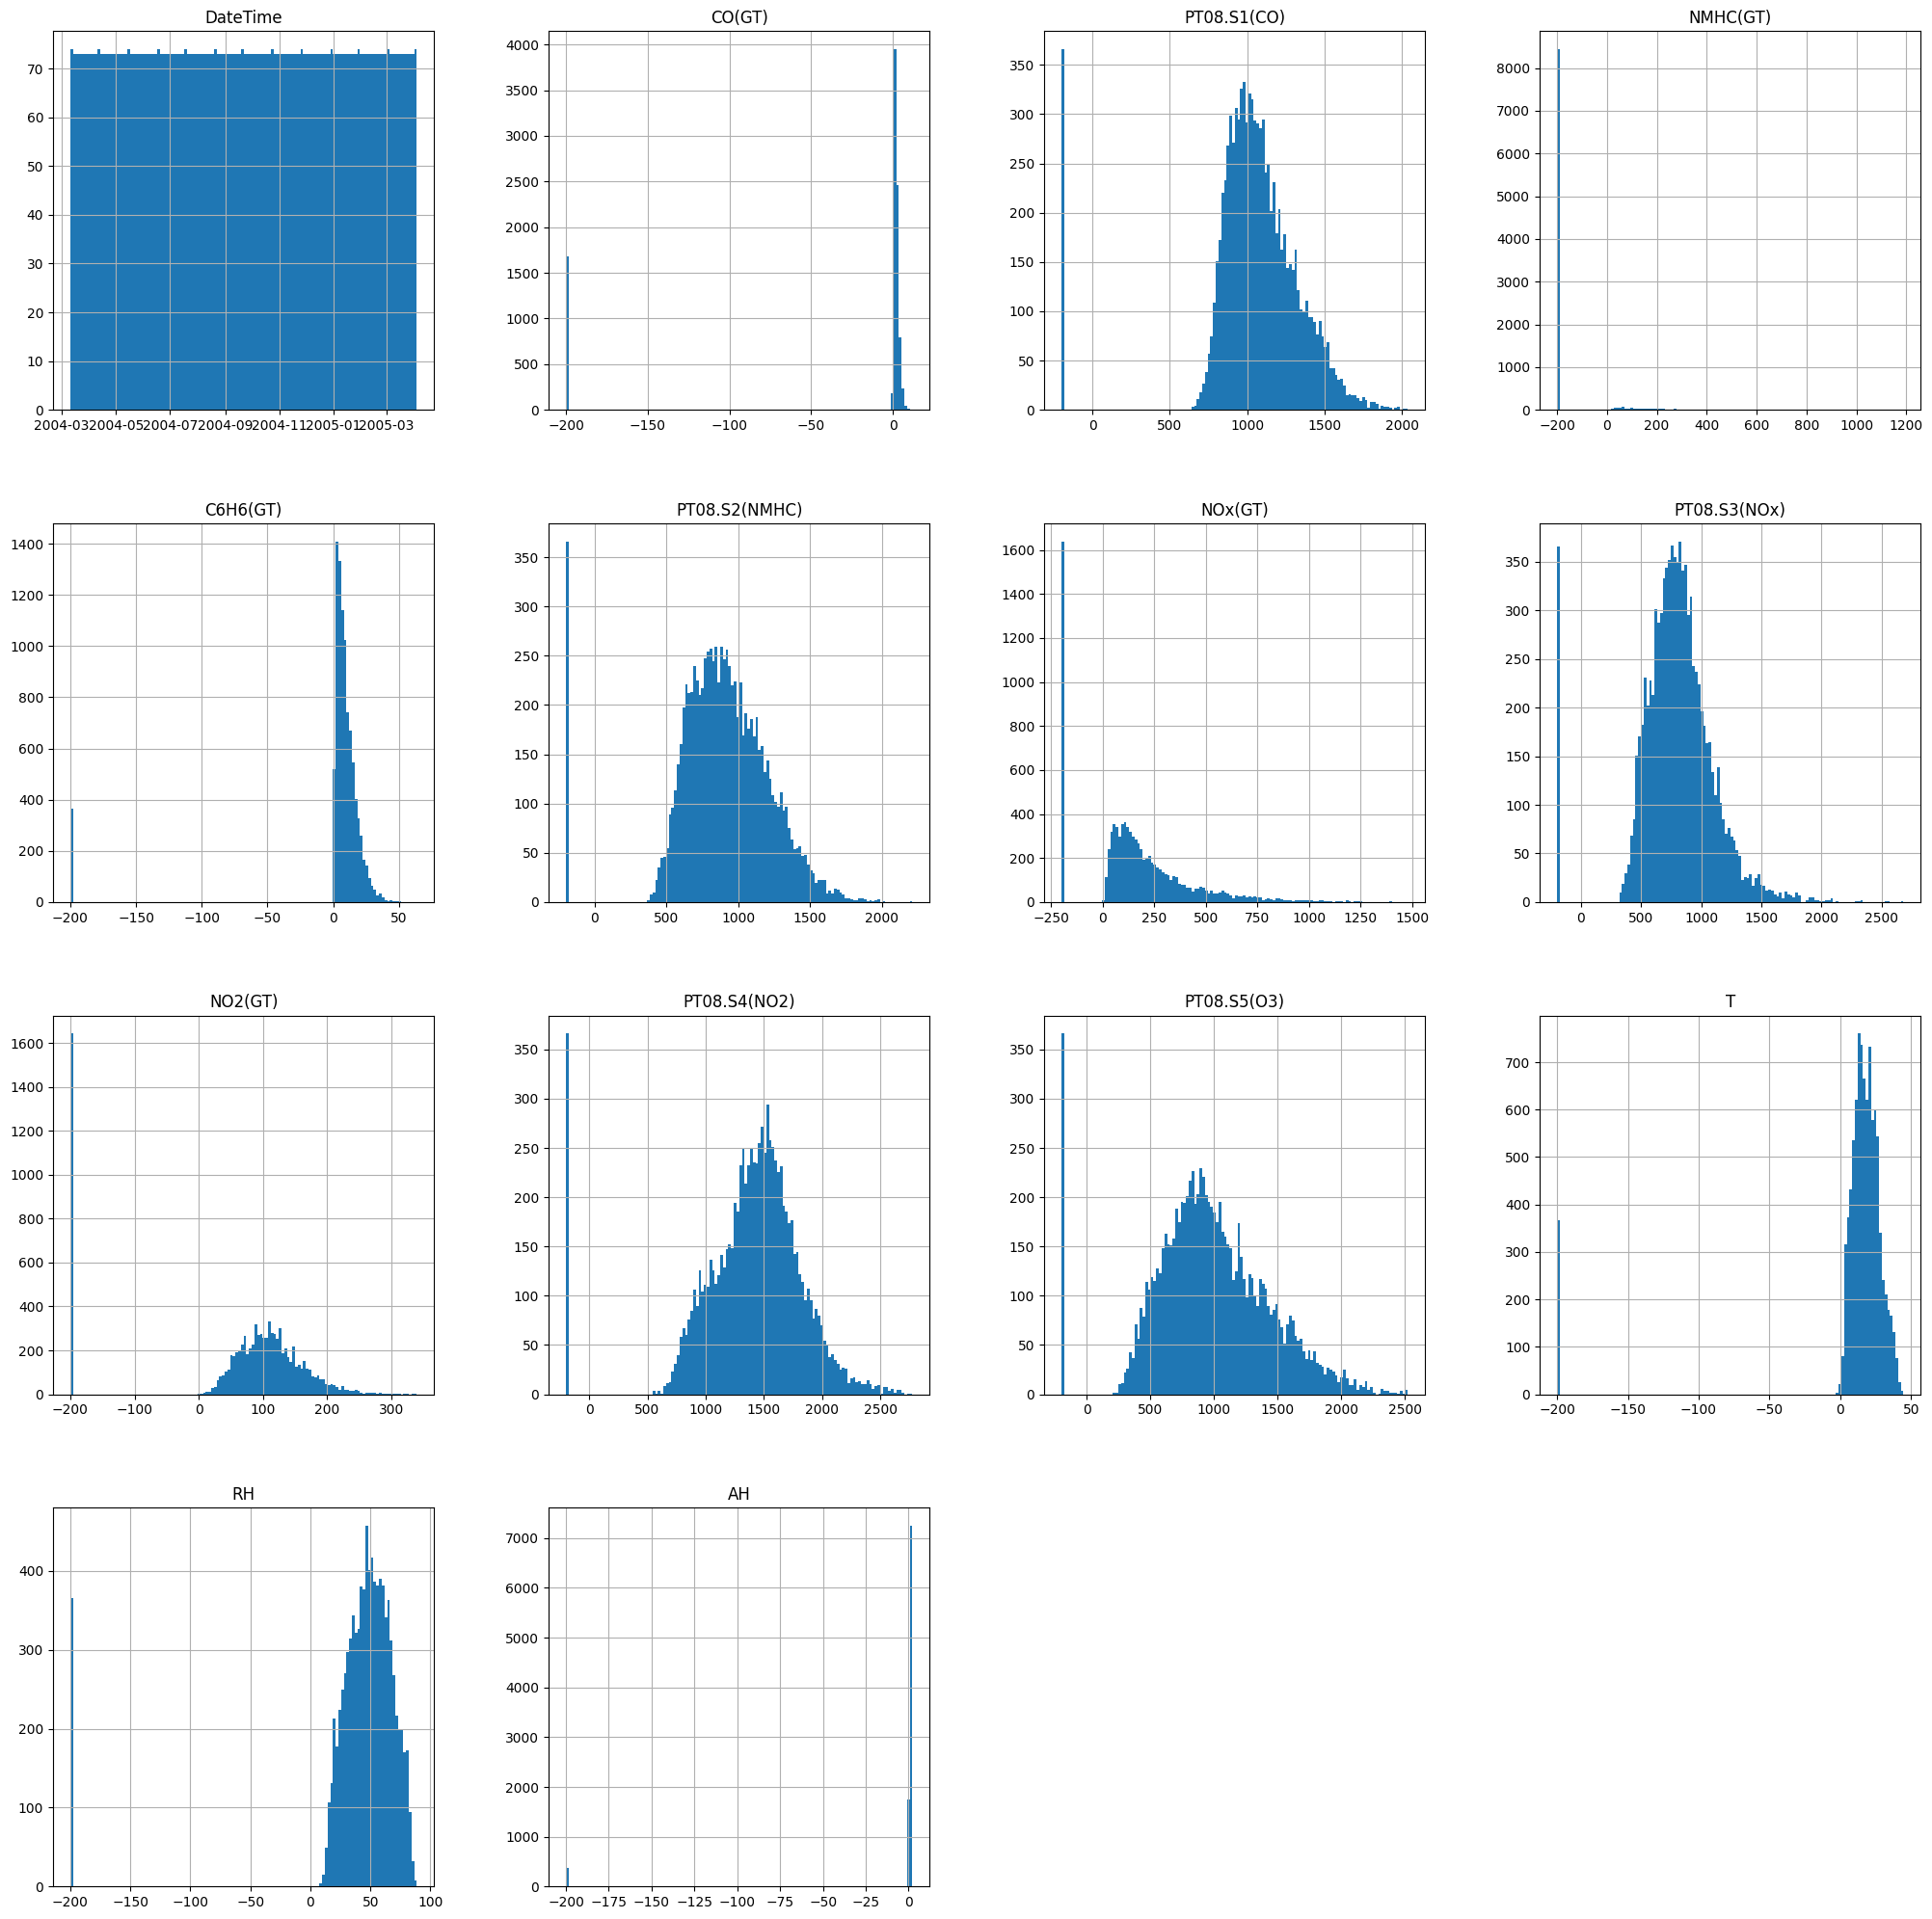

In [13]:
# plot a different histogram graph for each column
aiq_data.hist(bins=128, figsize=(25,25))
plt.show()

# Spotting data clipping visually
---

it is observable that in every data columns we have a concentration of data in some single values.

|Column|Type|
|-----------|-----------|
| DateTime     |Ok |
| CO(GT)       |Has clipping value |
| PT08.S1(CO)  |Has clipping value |
| NMHC(GT)     |Has clipping value |
| C6H6(GT)     |Has clipping value |
| PT08.S2(NMHC)|Has clipping value |
| NOx(GT)      |Has clipping value |
| PT08.S3(NOx) |Has clipping value |
| NO2(GT)      |Has clipping value |
| PT08.S4(NO2) |Has clipping value |
| PT08.S5(O3)  |Has clipping value |
| T            |Has clipping value |
| RH           |Has clipping value |
| AH           |Has clipping value |



In [14]:
# Making a second backup and spoting the clipping value of each column:
aiq_data_bk2_preDeClip = aiq_data.copy()


In [15]:
for col in aiq_data.columns: 
    if col == 'DateTime':
        continue
    else:
        col_min = aiq_data[col].min()
        col_max = aiq_data[col].max()
        number_of_min_values = 0
        number_of_max_values = 0

        for value in aiq_data[col]:
            if col_min == value:
                number_of_min_values += 1
            elif col_max == value:
                number_of_max_values += 1
            else:
                continue


    print(f'{col:<20} min: {col_min:<10} max: {col_max:<10} number of min values: {number_of_min_values:<10} number of max values: {number_of_max_values:<10}')

CO(GT)               min: -200.0     max: 11.9       number of min values: 1683       number of max values: 1         
PT08.S1(CO)          min: -200.0     max: 2040.0     number of min values: 366        number of max values: 1         
NMHC(GT)             min: -200.0     max: 1189.0     number of min values: 8443       number of max values: 1         
C6H6(GT)             min: -200.0     max: 63.7       number of min values: 366        number of max values: 1         
PT08.S2(NMHC)        min: -200.0     max: 2214.0     number of min values: 366        number of max values: 1         
NOx(GT)              min: -200.0     max: 1479.0     number of min values: 1639       number of max values: 1         
PT08.S3(NOx)         min: -200.0     max: 2683.0     number of min values: 366        number of max values: 1         
NO2(GT)              min: -200.0     max: 340.0      number of min values: 1642       number of max values: 1         
PT08.S4(NO2)         min: -200.0     max: 2775.0

In [16]:
# Foresaw this analysis we can spot that the highest values of the dataset has no clipping values
# on the other side, lower values have a low clipping floor of a '-200'

# Checking the percentage of values that are clipped for each column
for col in aiq_data.columns: 
    if col == 'DateTime':
        continue
    else:
        col_min = aiq_data[col].min()
        col_max = aiq_data[col].max()
        number_of_min_values = 0
        number_of_max_values = 0

        for value in aiq_data[col]:
            if col_min == value:
                number_of_min_values += 1
            elif col_max == value:
                number_of_max_values += 1
            else:
                continue
        perc = round(number_of_min_values/len(aiq_data)*100, 2)
        if perc > 15:
                print(f'{col:<20} % of low clipping values:\t  {perc:<5} !!!')
        else:
            print(f'{col:<20} % of low clipping values:\t  {perc:<10}')

CO(GT)               % of low clipping values:	  17.99 !!!
PT08.S1(CO)          % of low clipping values:	  3.91      
NMHC(GT)             % of low clipping values:	  90.23 !!!
C6H6(GT)             % of low clipping values:	  3.91      
PT08.S2(NMHC)        % of low clipping values:	  3.91      
NOx(GT)              % of low clipping values:	  17.52 !!!
PT08.S3(NOx)         % of low clipping values:	  3.91      
NO2(GT)              % of low clipping values:	  17.55 !!!
PT08.S4(NO2)         % of low clipping values:	  3.91      
PT08.S5(O3)          % of low clipping values:	  3.91      
T                    % of low clipping values:	  3.91      
RH                   % of low clipping values:	  3.91      
AH                   % of low clipping values:	  3.91      


# Clipped data analysis:

All the column has a floor-clipping value of -200, in particular 'NMHC(GT)' has the vas majority of the values clipped at the lower bound (>90% of values are clipped).DS_Store


In [17]:
# replacing lower-bound clipping data with an estimation based on a normal distribution

low_bound = -200

for col in aiq_data.columns:
    if col == 'DateTime':
        continue
    else:
        # get the indices of the clipped values and create a mask
        clipped_indices = aiq_data[aiq_data[col] == low_bound].index            

    # fit a normal distribution to the data
    non_clipped_values = aiq_data[aiq_data[col] > low_bound][col]
    mu = non_clipped_values.mean()
    sigma = non_clipped_values.std()
    # generate some values (that must be >0 for the sense of the data)
    replacement_values = np.random.normal(mu, sigma, len(clipped_indices))
    replacement_values = np.where(replacement_values < 0, 0, replacement_values)
    # replace the clipped values
    aiq_data.loc[clipped_indices, col] = replacement_values
    # if we generated values below 0 (not possible for the data), we replace them with 0
    aiq_data[col] = np.where(aiq_data[col] < 0, 0, aiq_data[col])



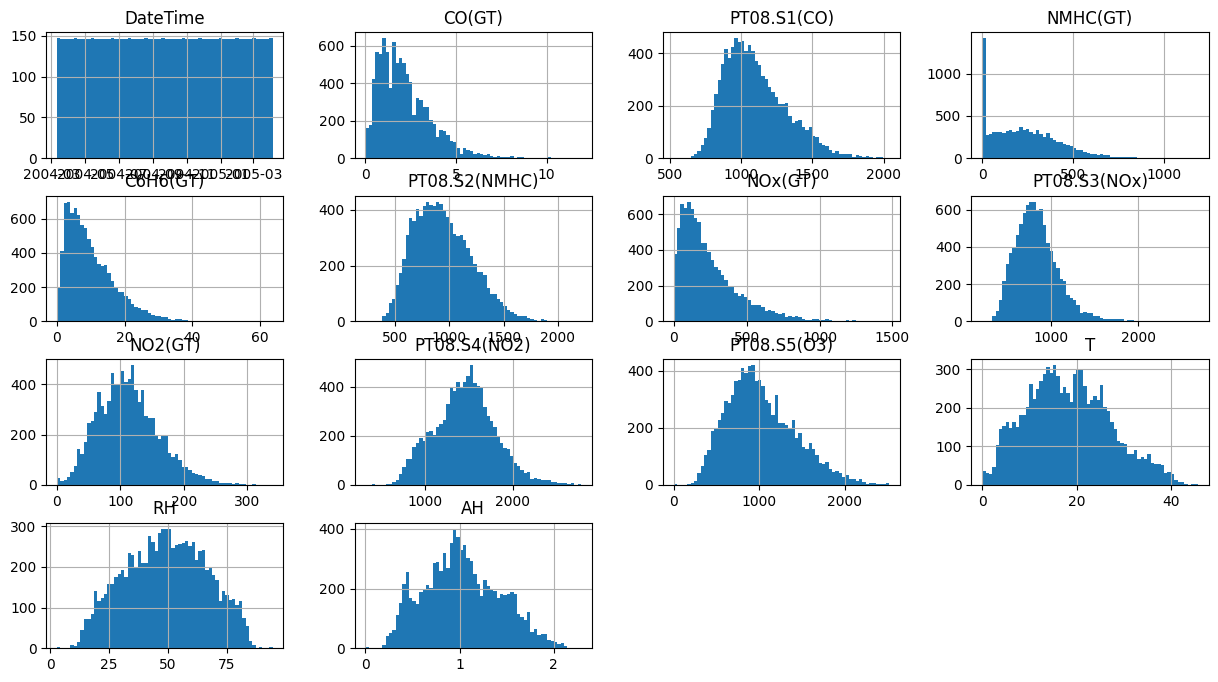

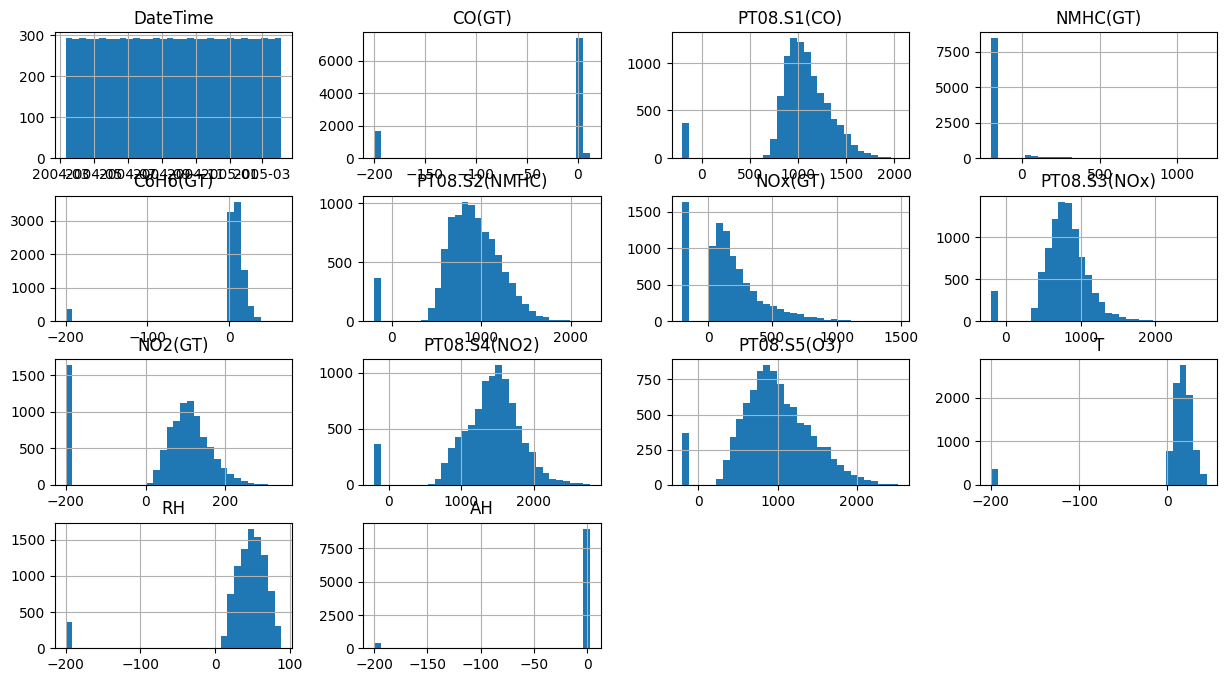

In [18]:
# Spot the clipping values after the replacement visually:
aiq_data.hist(bins=64, figsize=(15,8))
plt.show()

aiq_data_bk2_preDeClip.hist(bins=32, figsize=(15,8))

plt.show()

# EDA:

## Correlation between Temperature and quantity o pollutants in the air

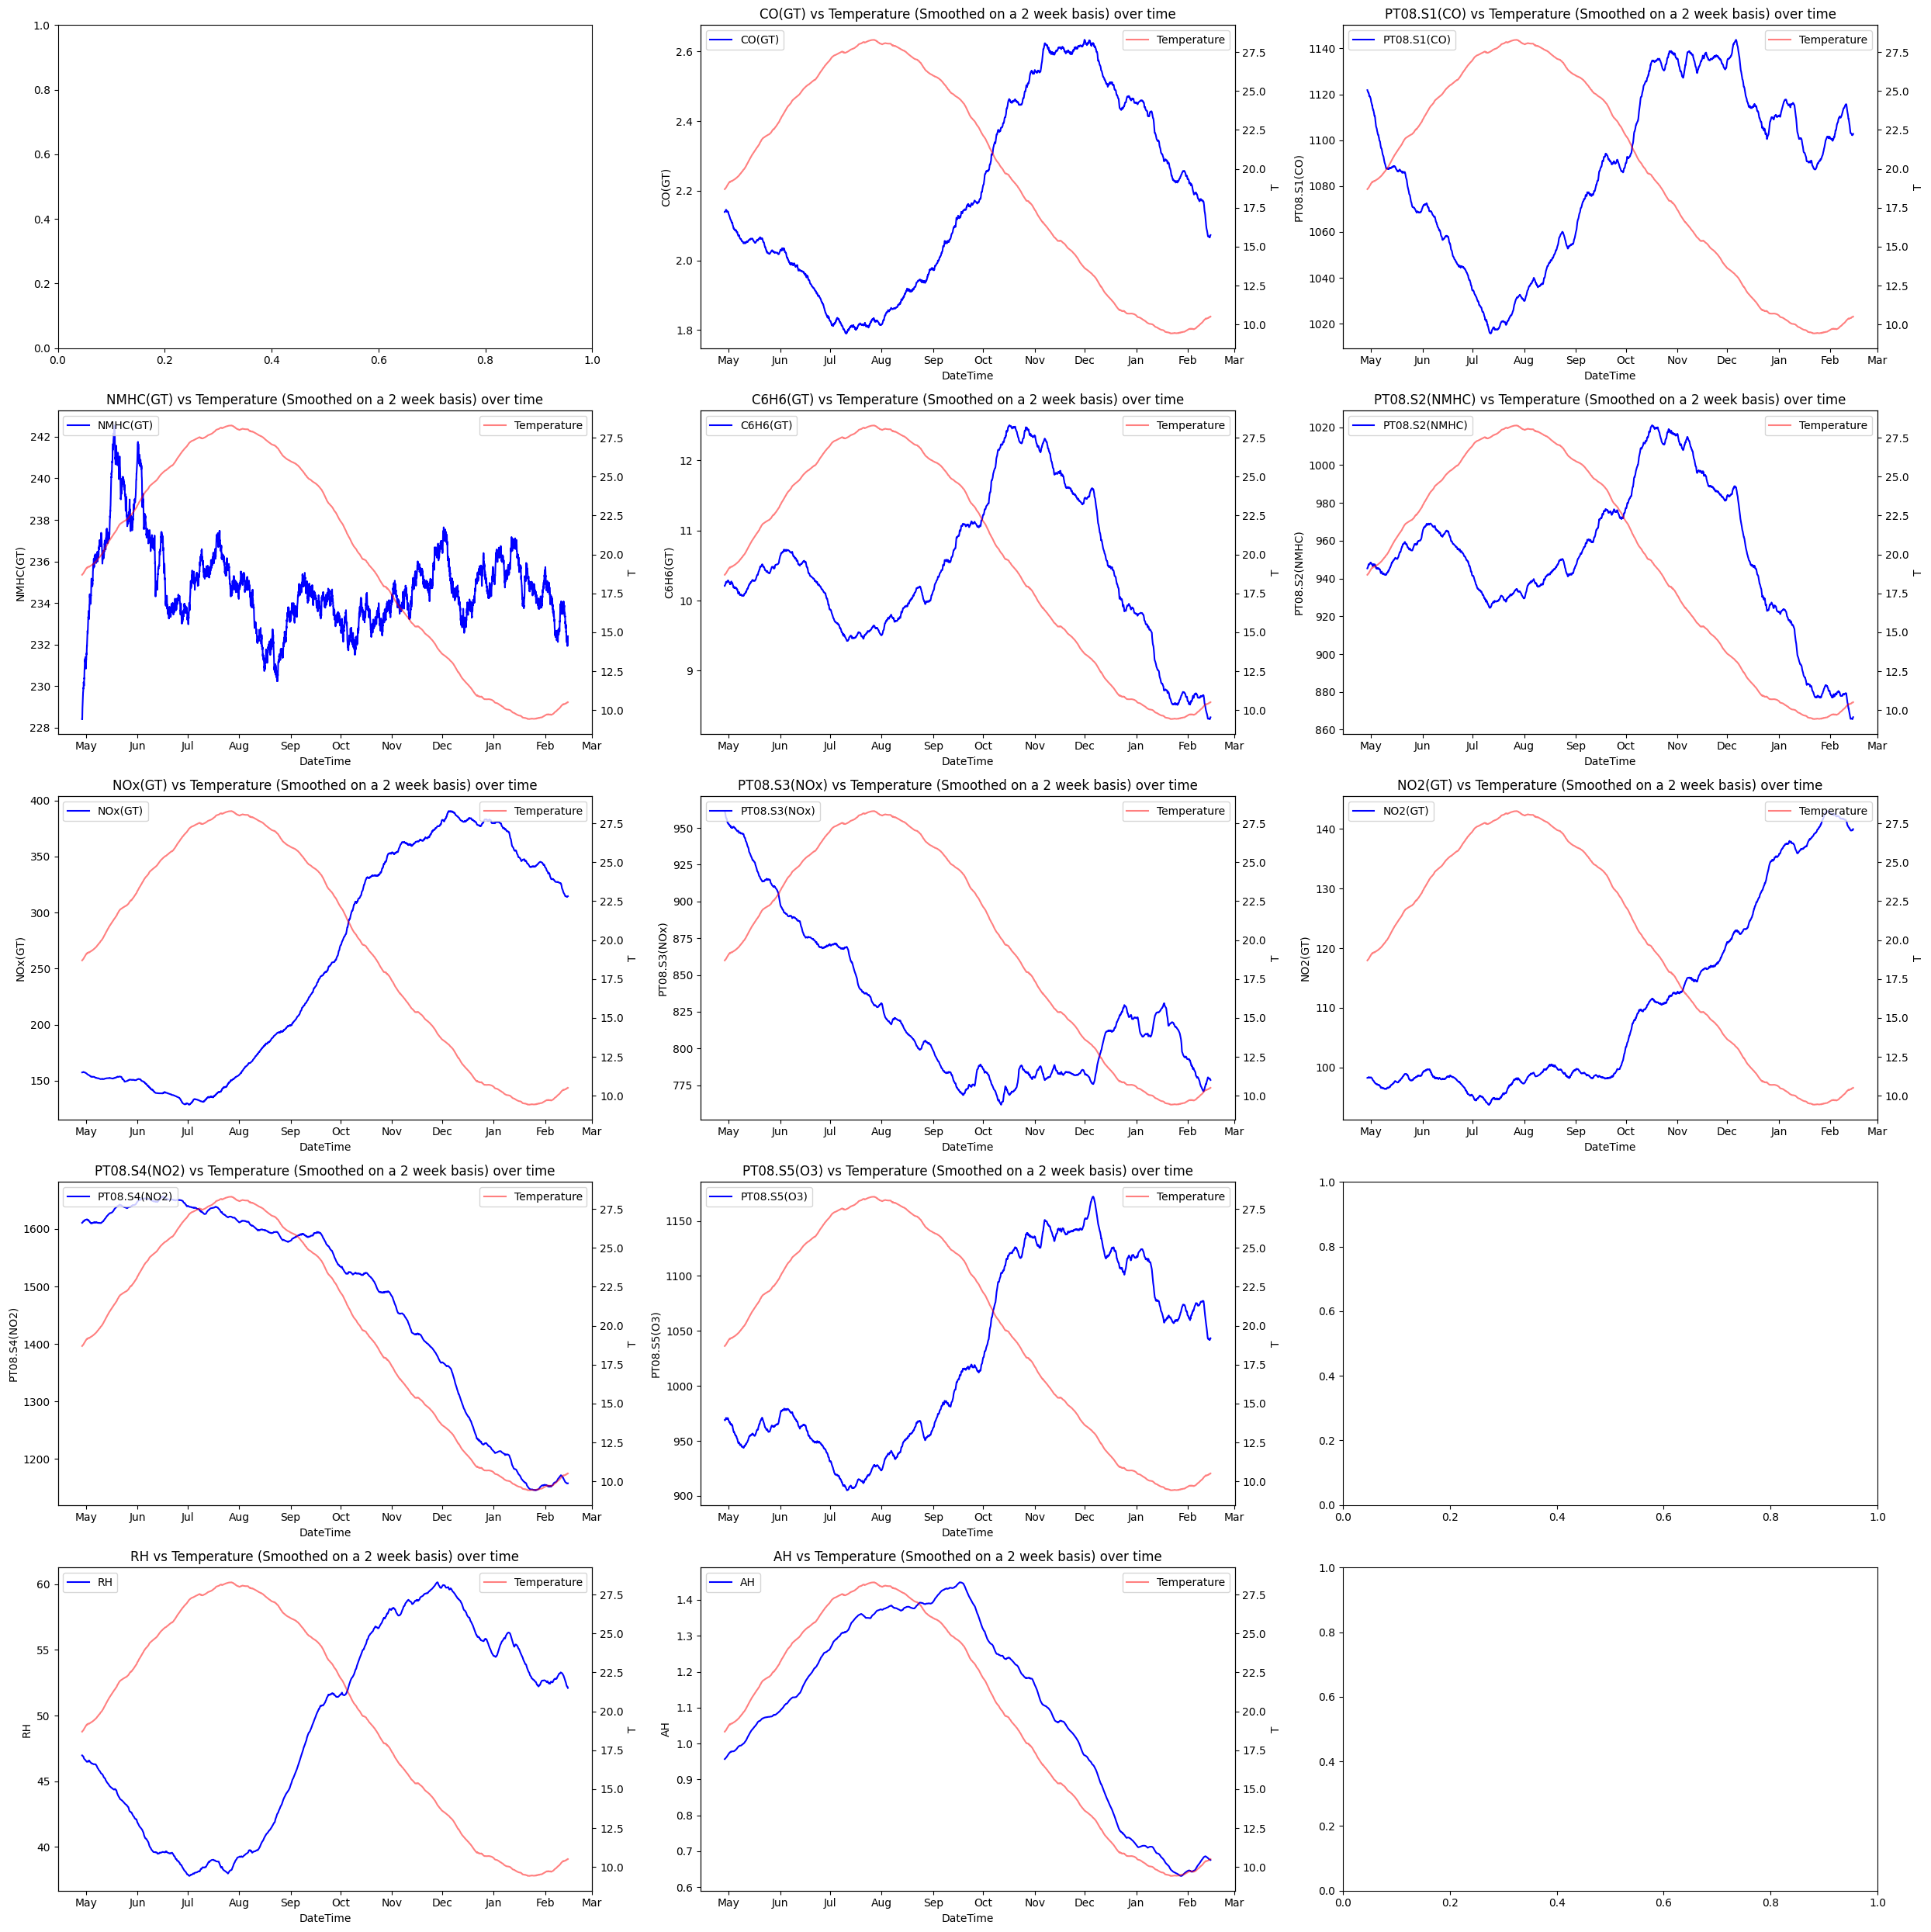

In [19]:
# Determine the number of columns and rows for the grid
num_cols = len(aiq_data.columns) - 1  # Exclude 'DateTime'
num_rows = math.ceil(num_cols / 3) # 3 columns per row



# Extract month and create a new column for month names
aiq_data['Month'] = aiq_data['DateTime'].dt.strftime('%b')  # Short month names (e.g., Jan, Feb)

# Create a figure and axes
fig, axes = plt.subplots(num_rows, 3, figsize=(25, 5 * num_rows))
axes = axes.flatten()

# Plot the data
for i, col in enumerate(aiq_data.columns):
    if col == 'DateTime' or col == 'Month' or col == 'T':  # Skip DateTime and Temperature column
        continue
    else:
        smoothed_values = aiq_data[col].rolling(window=2352, center=True).mean()  # Adjust window size
        temperature = aiq_data['T'].rolling(window=2352, center=True).mean()  # Smooth temperature
        
        # Plot the smoothed values on the primary y-axis
        sb.lineplot(x=aiq_data['DateTime'], y=smoothed_values, ax=axes[i], label=col, color='blue')
        axes[i].set_title(f'{col} vs Temperature (Smoothed on a 2 week basis) over time')

        # Create a secondary y-axis for temperature
        ax2 = axes[i].twinx()  # Create twin axes sharing the same x-axis
        sb.lineplot(x=aiq_data['DateTime'], y=temperature, ax=ax2, label='Temperature', color='red', alpha=0.5)

        # Format x-axis to display months
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Month format
        axes[i].xaxis.set_major_locator(mdates.MonthLocator())  # Tick for each month

        # Add legends to both axes
        axes[i].legend(loc='upper left')
        ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Analyze the distribution of every pollutant through KDE plots


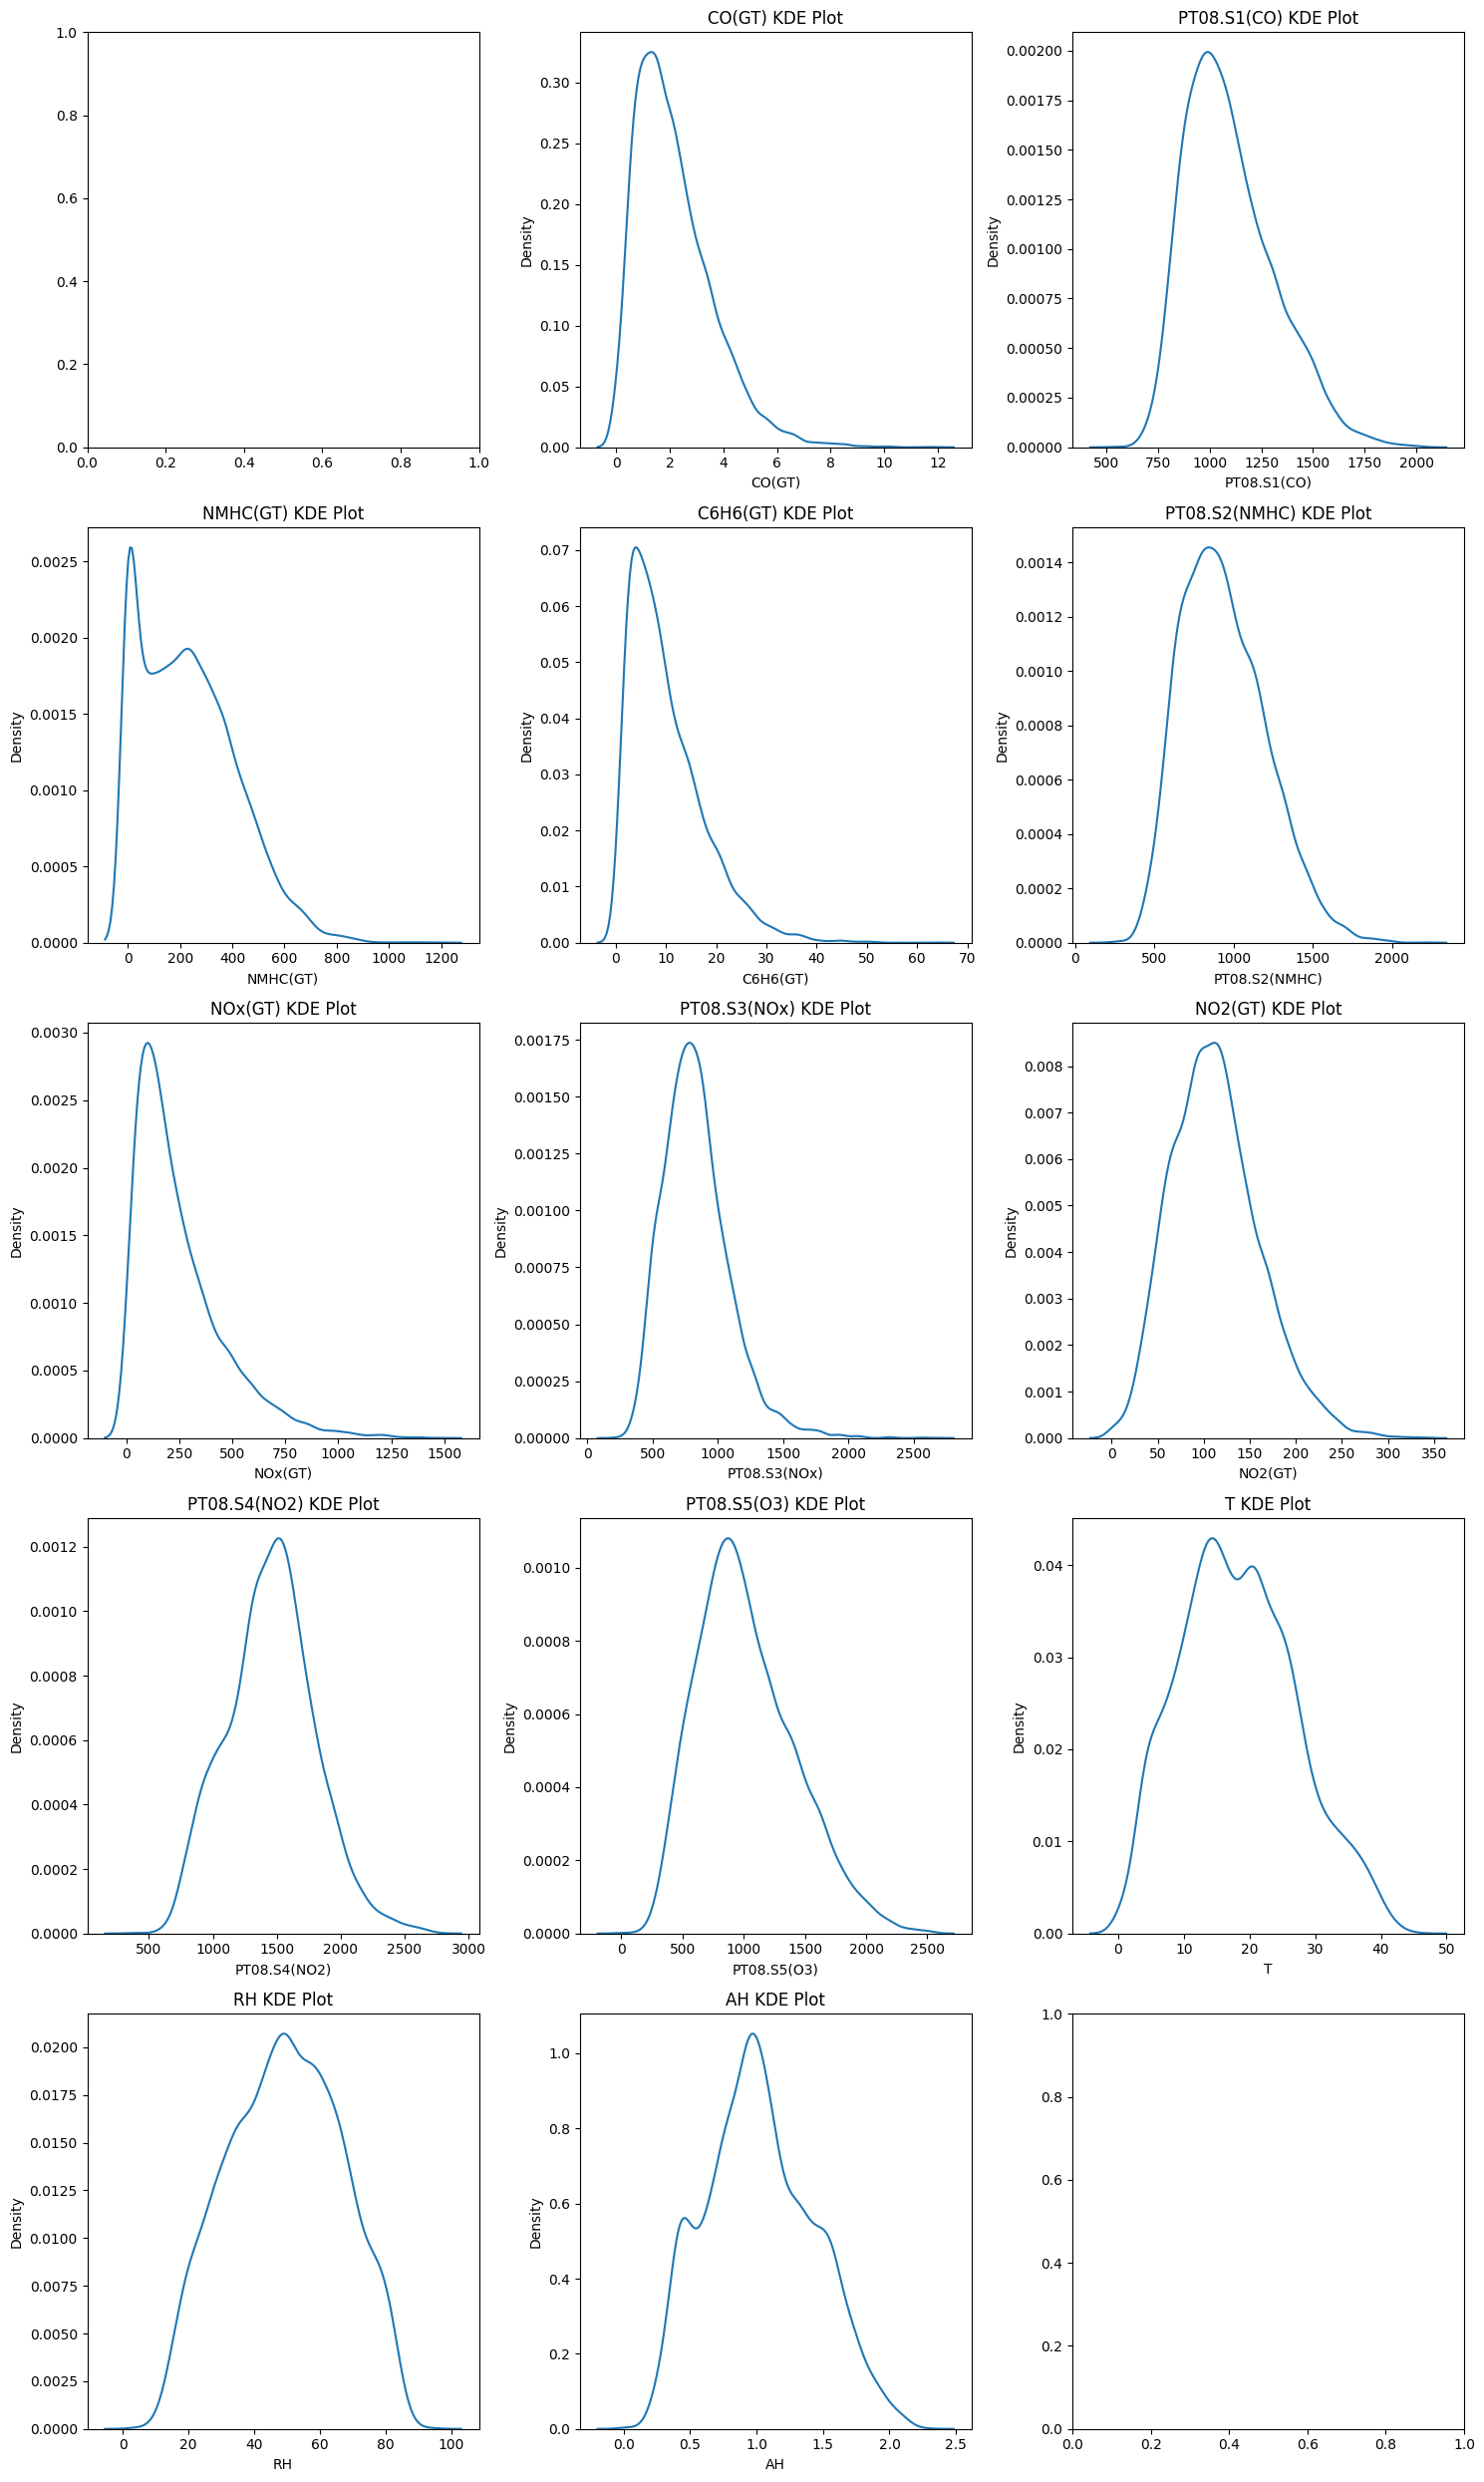

In [20]:
# generating a grid of KDE plots

import math

# Determine the number of columns and rows for the grid
num_cols = len(aiq_data.columns) - 1  # Exclude 'DateTime'
num_rows = math.ceil(num_cols / 3) # 3 columns per row

# Create a figure and axes
fig = plt.figure(figsize=(15, 5 * num_rows))
axes = fig.subplots(num_rows, 3).flatten()

# Generate KDE plots
for i, col in enumerate(aiq_data.columns): # for i and col in the number of columns: [0,1,2,3...]
    if col == 'DateTime':               # if the column is 'DateTime' skip it
        continue
    else:
        if pd.api.types.is_numeric_dtype(aiq_data[col]):
            sb.kdeplot(aiq_data[col], ax=axes[i])   # plot the kde plot of the column in the i-th position
            axes[i].set_title(f'{col} KDE Plot')    # set the title of the plot to the name of the column

# Turn off empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Heatmap correlation graph

Correlazione con la Temperatura (T):
CO(GT)           0.022394
PT08.S1(CO)      0.046487
NMHC(GT)         0.019661
C6H6(GT)         0.194159
PT08.S2(NMHC)    0.229589
NOx(GT)         -0.217615
PT08.S3(NOx)    -0.138760
NO2(GT)         -0.149181
PT08.S4(NO2)     0.539670
PT08.S5(O3)     -0.028615
dtype: float64

Correlazione con l'Umidità Assoluta (AH):
CO(GT)           0.036218
PT08.S1(CO)      0.128001
NMHC(GT)         0.021861
C6H6(GT)         0.163848
PT08.S2(NMHC)    0.178171
NOx(GT)         -0.118479
PT08.S3(NOx)    -0.221336
NO2(GT)         -0.259003
PT08.S4(NO2)     0.601512
PT08.S5(O3)      0.068607
dtype: float64


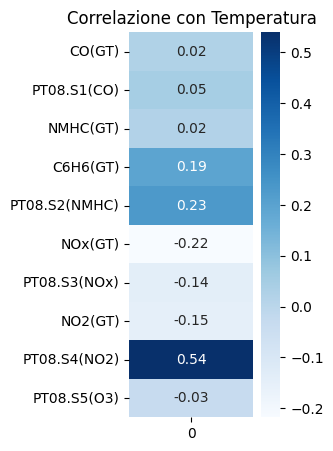

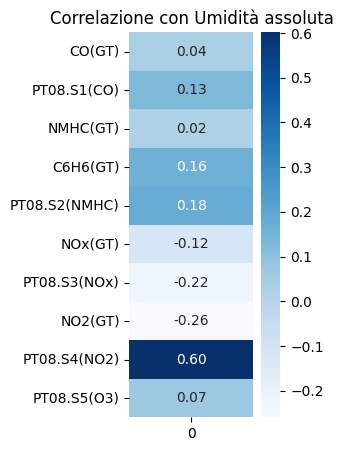

In [21]:
# pollutants 
pollutants = aiq_data.drop(columns=['DateTime', 'T', 'RH', 'AH', 'Month'])

# Corr with temp T
corr_with_temp = pollutants.corrwith(aiq_data['T'])
print("Correlazione con la Temperatura (T):")
print(corr_with_temp)

# corr with relative humidity HR
corr_with_humidity = pollutants.corrwith(aiq_data['AH'])
print("\nCorrelazione con l'Umidità Assoluta (AH):")
print(corr_with_humidity)

# Heatmap plot
plt.figure(figsize=(2, 5))
sb.heatmap(corr_with_temp.to_frame(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlazione con Temperatura")
plt.show()

plt.figure(figsize=(2, 5))
sb.heatmap(corr_with_humidity.to_frame(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlazione con Umidità assoluta")
plt.show()